In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Data Cleaning

In [2]:
data=pd.read_csv('movies.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
# percentage fo null values in each column

for col in data.columns:
    missing_percentage=np.mean(data[col].isnull())
    print('{} - {}%'.format(col,missing_percentage))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# or find number of null values like this

nulls_count=data.isnull().sum()
print(nulls_count)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# fill the NA values with appropriate values

# for numeric values, use mode
for col in ['rating','score','votes','country','budget','gross','runtime']:
    data[col]=data[col].fillna(data[col].mode()[0])

# for object data type, use 'Unknown' 
for col in ['released','company','star','writer']:
    data[col]=data[col].fillna('Unknown')

In [7]:
for column in ['votes','budget','gross','runtime']:
    data[column]=data[column].astype('int64')

In [8]:
# set the displaying rows to the maximum
# pd.set_option('display.max_rows',None)

# sort values
data.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20000000,1400,British Broadcasting Corporation (BBC),103
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20000000,790,Visual Arts Entertainment,104
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20000000,682,Roxwell Films,93
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134


In [9]:
# find the repeating values

# data['company'].sort_values(ascending=False)

In [10]:
# remove if there are dupliacate values

data=data.drop_duplicates()

# Correlation

### Budget vs Gross

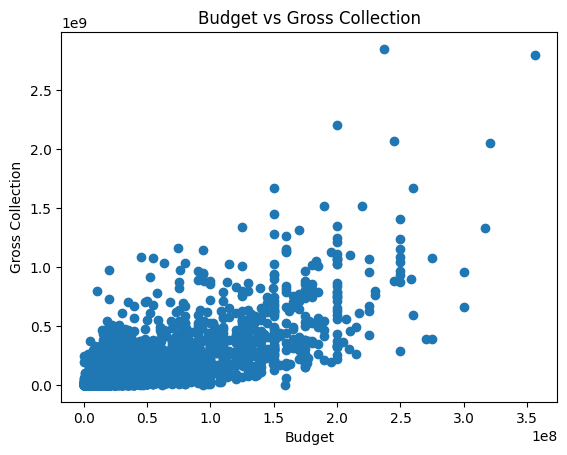

In [11]:
plt.scatter(x=data['budget'],y=data['gross'])
plt.title('Budget vs Gross Collection')
plt.xlabel('Budget')
plt.ylabel('Gross Collection')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

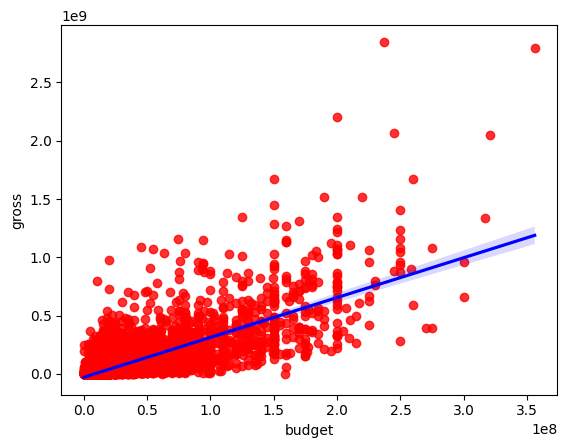

In [12]:
sb.regplot(x='budget',y='gross',data=data,scatter_kws={'color':'red'},line_kws={'color':'blue'})


In [13]:
# correlation
# using method - pearson, kendall, spearman

data.corr(numeric_only=True,method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098084,0.222485,0.292360,0.260251,0.120431
score,0.098084,1.000000,0.409123,0.061775,0.185799,0.399543
votes,0.222485,0.409123,1.000000,0.462013,0.632376,0.309150
budget,0.292360,0.061775,0.462013,1.000000,0.746670,0.273507
gross,0.260251,0.185799,0.632376,0.746670,1.000000,0.244711
runtime,0.120431,0.399543,0.309150,0.273507,0.244711,1.000000


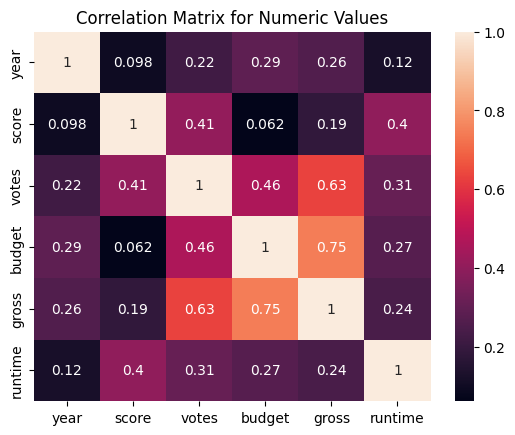

In [14]:
# visualizing the correlation matrix

corr_matrix=data.corr(numeric_only=True,method='pearson')
sb.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.show()

In [15]:
# numerizing every columns which are not numeric

data_numerized=data.copy()

for col in data_numerized.columns:
    if (data_numerized[col].dtype=='object'):
        data_numerized[col]=data_numerized[col].astype('category')
        data_numerized[col]=data_numerized[col].cat.codes
        


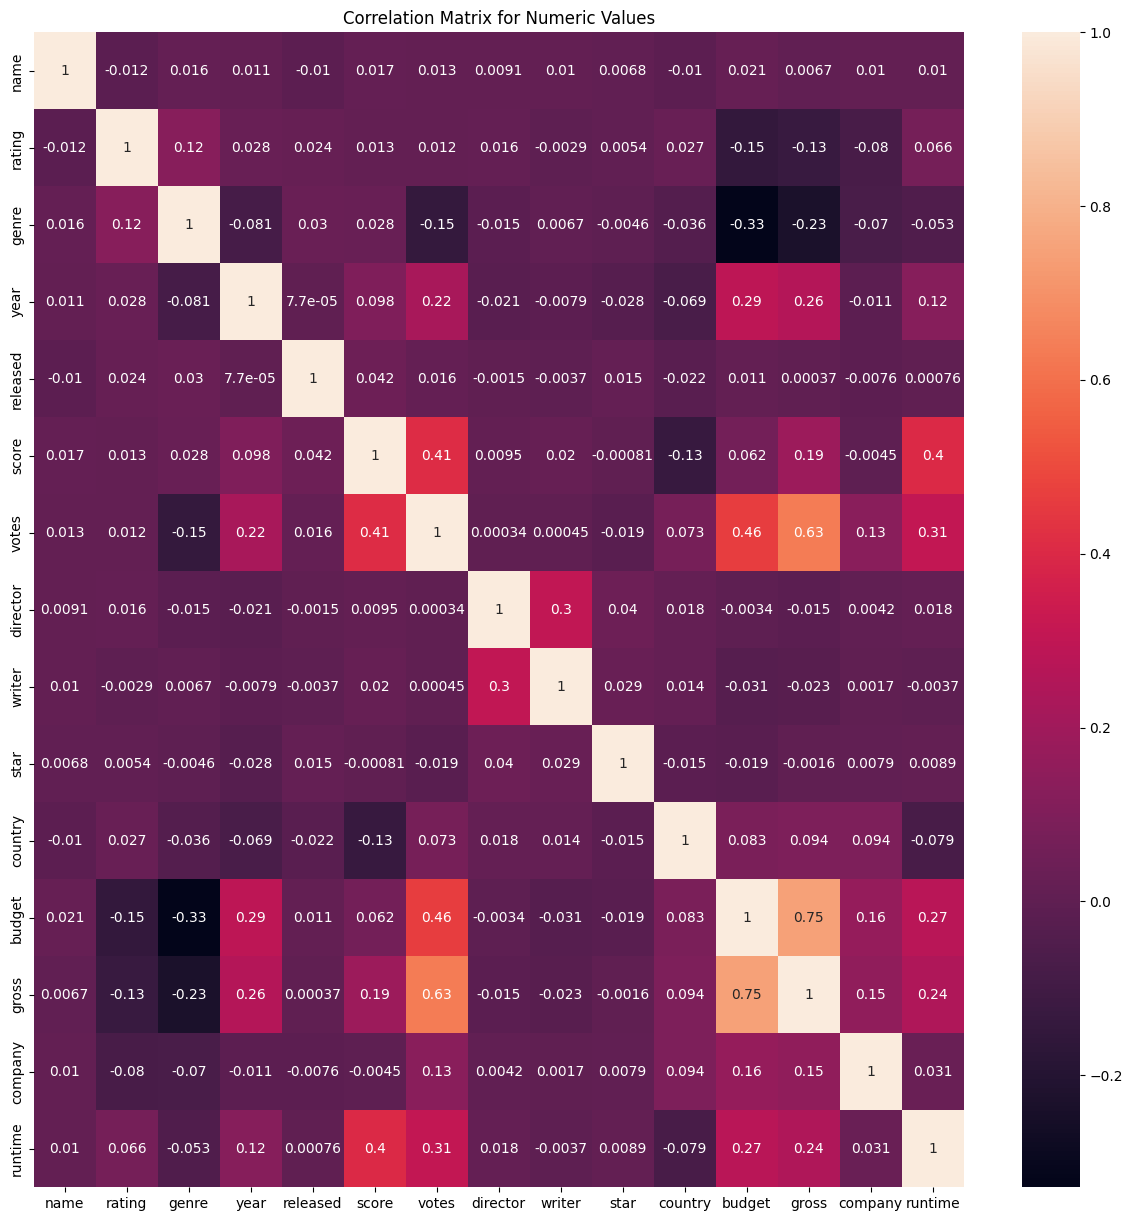

In [16]:
# creating a heatmap of the entire table

corr_matrix=data_numerized.corr(numeric_only=True,method='pearson')
plt.figure(figsize=(15,15))
sb.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.show()

In [17]:
# unstack correlation matrix

corr_values=data_numerized.corr()
values=corr_values.unstack()
values

name     name        1.000000
         rating     -0.012441
         genre       0.016355
         year        0.011453
         released   -0.010480
                       ...   
runtime  country    -0.079385
         budget      0.273507
         gross       0.244711
         company     0.030916
         runtime     1.000000
Length: 225, dtype: float64

In [18]:
sorted_values=values.sort_values()
sorted_values

genre    budget    -0.328865
budget   genre     -0.328865
gross    genre     -0.233674
genre    gross     -0.233674
rating   budget    -0.148192
                      ...   
budget   budget     1.000000
country  country    1.000000
gross    gross      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [19]:
# pairs with high correlation

high_corr=sorted_values[(sorted_values)>0.5]
high_corr

votes     gross       0.632376
gross     votes       0.632376
budget    gross       0.746670
gross     budget      0.746670
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [20]:
# 'budget' and 'votes' have the highest correlatin to 'gross'